In [7]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 59.9 MB/s eta 0:00:00


In [41]:
%matplotlib inline  
import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore') 

# path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
# font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
# plt.rc('font', family=font_name)
# fm._rebuild()

In [10]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [38]:
path = '/content/gdrive/MyDrive/phone_cancel'
train = pd.read_csv(f'{path}/train.csv')
test = pd.read_csv(f'{path}/test.csv')

In [12]:
train

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,TRAIN_30195,263,80,289.6,201,21.8,280.5,323,29.88,208.0,66,9.28,2,0
30196,TRAIN_30196,283,81,210.7,280,90.5,284.1,202,32.80,287.8,203,6.28,2,0
30197,TRAIN_30197,24,0,222.4,33,22.1,233.9,32,22.22,293.6,95,4.22,2,0
30198,TRAIN_30198,63,1,262.4,202,29.6,280.6,282,28.88,280.9,207,20.88,2,1


In [13]:
train.describe()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
count,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000
mean,159.732649,12.037815,250.563457,159.175728,41.091447,263.247215,158.474536,25.394260,263.438285,157.047417,12.074648,2.288079,0.109868
std,123.752781,24.925334,84.403350,101.573057,23.179017,74.064922,102.200293,8.146126,73.778416,101.721601,9.414261,2.050746,0.312730
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,20.800000,20.000000,1.040000,0.000000,0.000000
25%,63.000000,0.000000,222.800000,88.000000,24.400000,223.700000,87.000000,22.220000,223.700000,87.000000,4.700000,2.000000,0.000000
50%,118.000000,1.000000,234.000000,117.500000,30.800000,243.000000,112.000000,23.320000,242.800000,108.000000,9.080000,2.000000,0.000000
75%,228.000000,22.000000,289.600000,223.000000,45.900000,290.300000,223.000000,28.820000,290.500000,222.000000,20.290000,2.000000,0.000000
max,2212.000000,1112.000000,481.900000,489.000000,118.600000,481.600000,489.000000,49.980000,481.800000,490.000000,44.980000,11.000000,1.000000


In [14]:
test.describe()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수
count,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000
mean,159.776713,12.312756,251.066221,159.761724,40.887059,263.656424,159.628216,25.440460,264.052963,157.692112,12.095035,2.301476
std,118.383432,28.069438,85.236623,103.648878,23.062830,75.232035,103.417132,8.288719,74.877379,101.640429,9.459368,2.058855
min,2.000000,0.000000,0.200000,0.000000,0.100000,0.200000,0.000000,0.000000,21.300000,20.000000,2.000000,0.000000
25%,63.000000,0.000000,222.700000,88.000000,24.400000,223.800000,87.000000,22.220000,223.700000,86.000000,4.880000,2.000000
50%,119.000000,1.000000,234.000000,115.000000,30.800000,242.700000,113.000000,23.300000,242.800000,111.000000,9.060000,2.000000
75%,228.000000,22.000000,289.800000,223.000000,45.900000,290.350000,223.000000,28.820000,290.700000,223.000000,20.290000,2.000000
max,2212.000000,1112.000000,481.800000,489.000000,118.100000,481.500000,490.000000,49.990000,481.700000,489.000000,44.980000,11.000000


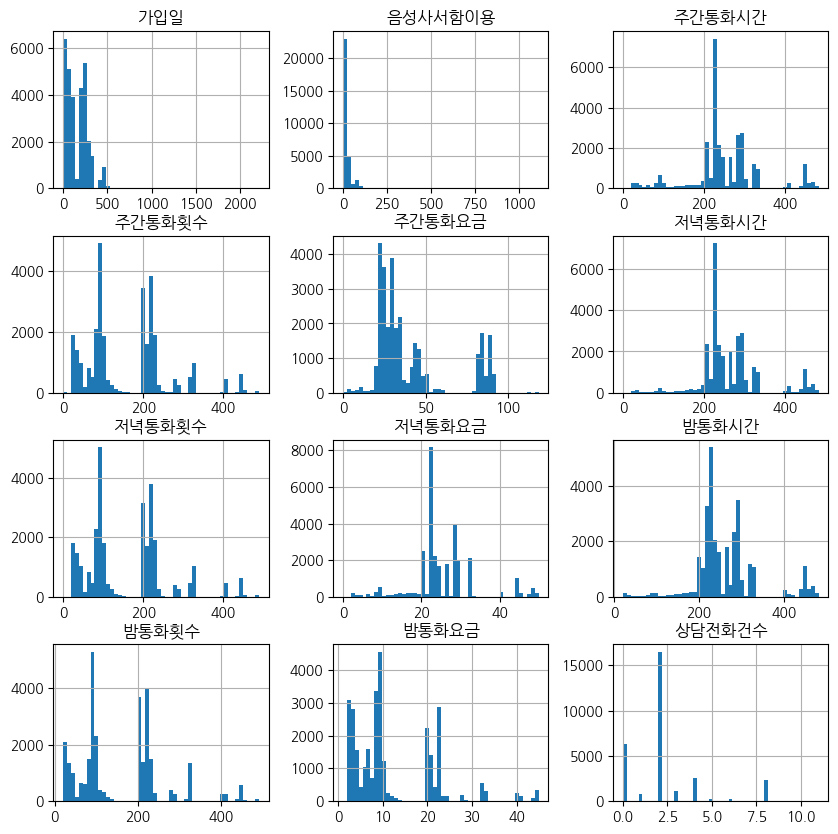

In [19]:
train.drop(['전화해지여부'], axis=1).hist(bins=50, figsize=(10, 10))
plt.show()

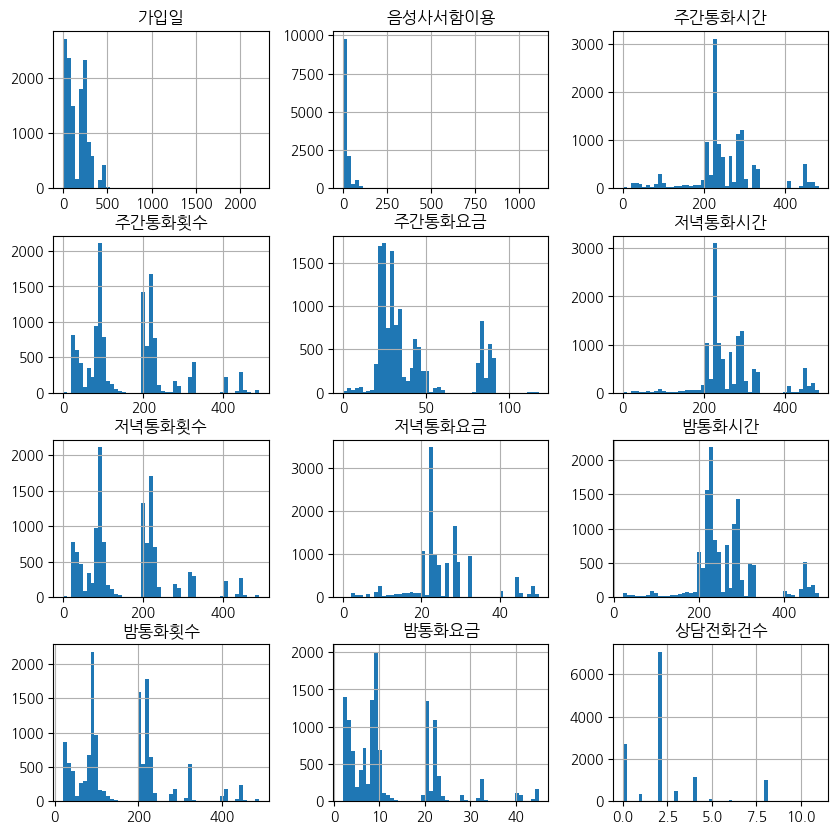

In [20]:
test.hist(bins=50, figsize=(10, 10))
plt.show()

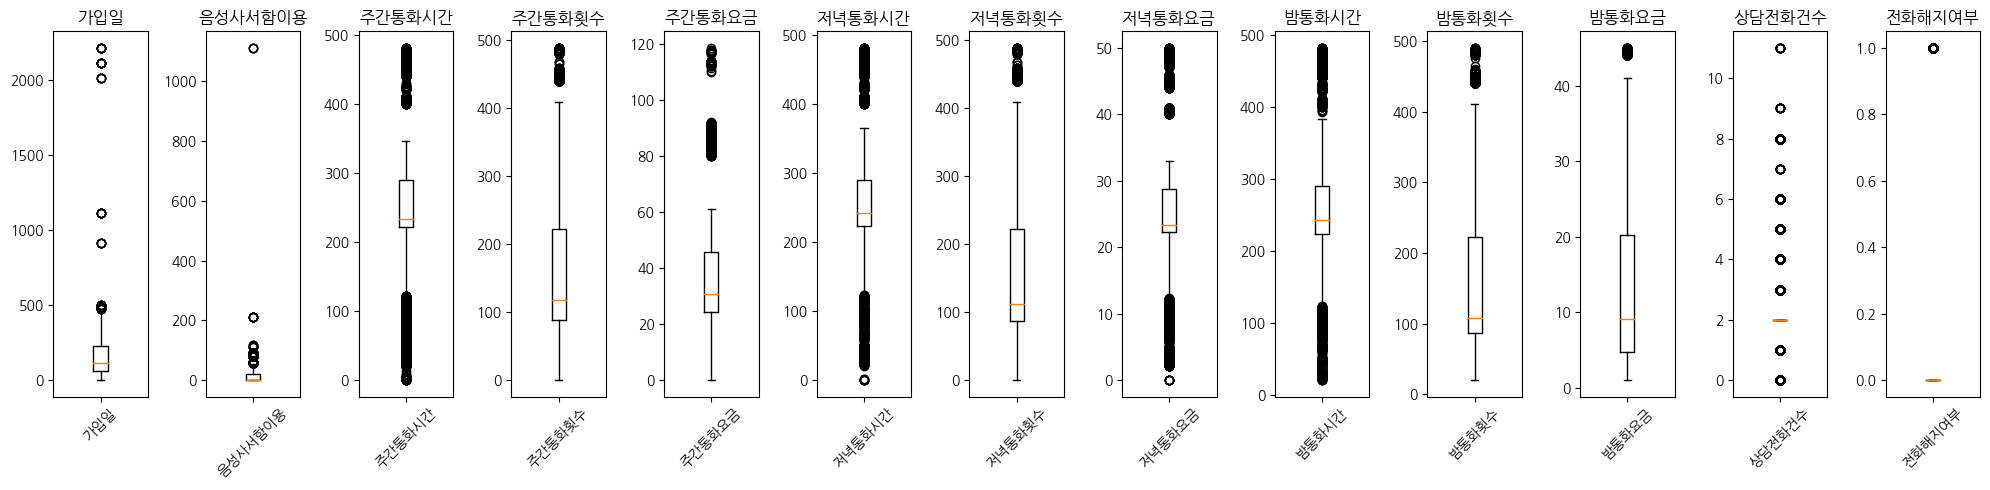

In [39]:
train = train.drop(['ID'], axis=1)
fig, axs = plt.subplots(ncols=len(train.columns), figsize=(20, 5))

for i, column in enumerate(train.columns):
    axs[i].boxplot(train[column])
    axs[i].set_title(f'{column}')
    axs[i].set_xticklabels([column], rotation=45)

plt.tight_layout()
plt.show()

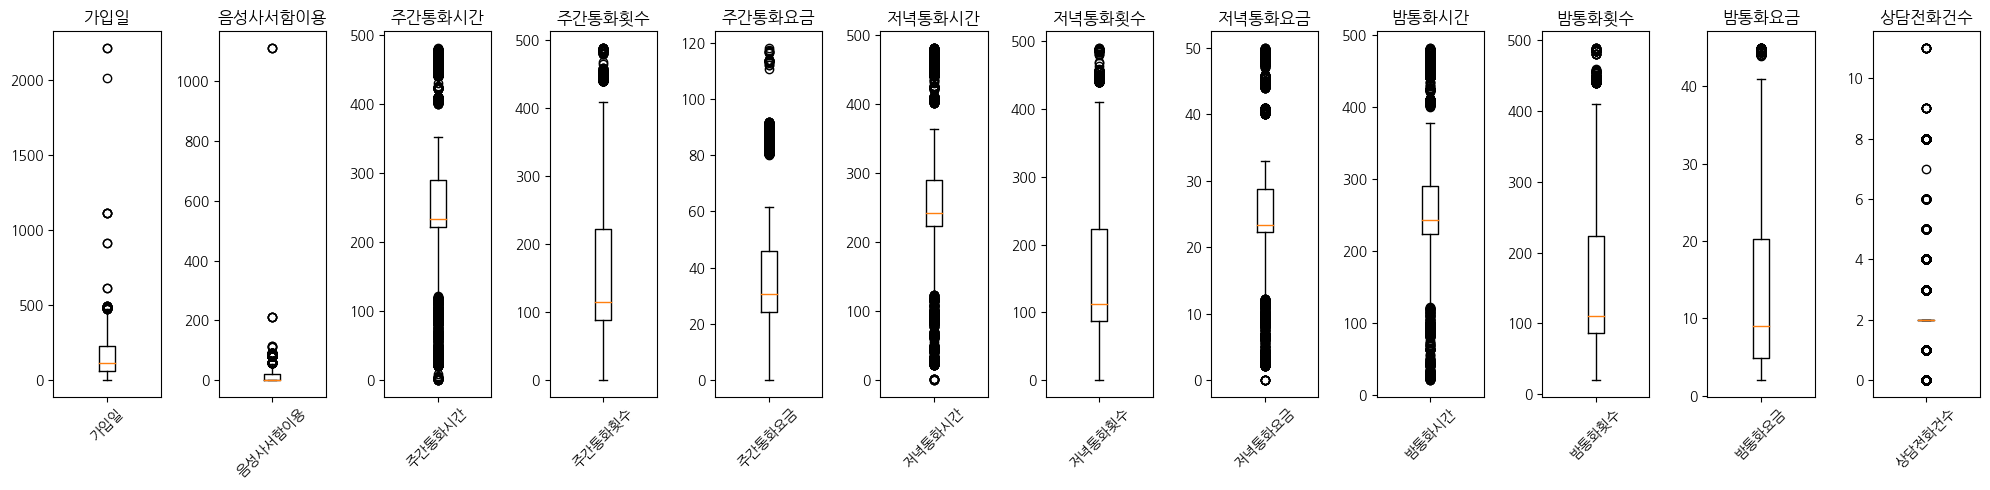

In [40]:
test = test.drop(['ID'], axis=1)
fig, axs = plt.subplots(ncols=len(test.columns), figsize=(20, 5))

for i, column in enumerate(test.columns):
    axs[i].boxplot(test[column])
    axs[i].set_title(f'{column}')
    axs[i].set_xticklabels([column], rotation=45)

plt.tight_layout()
plt.show()

<Axes: >

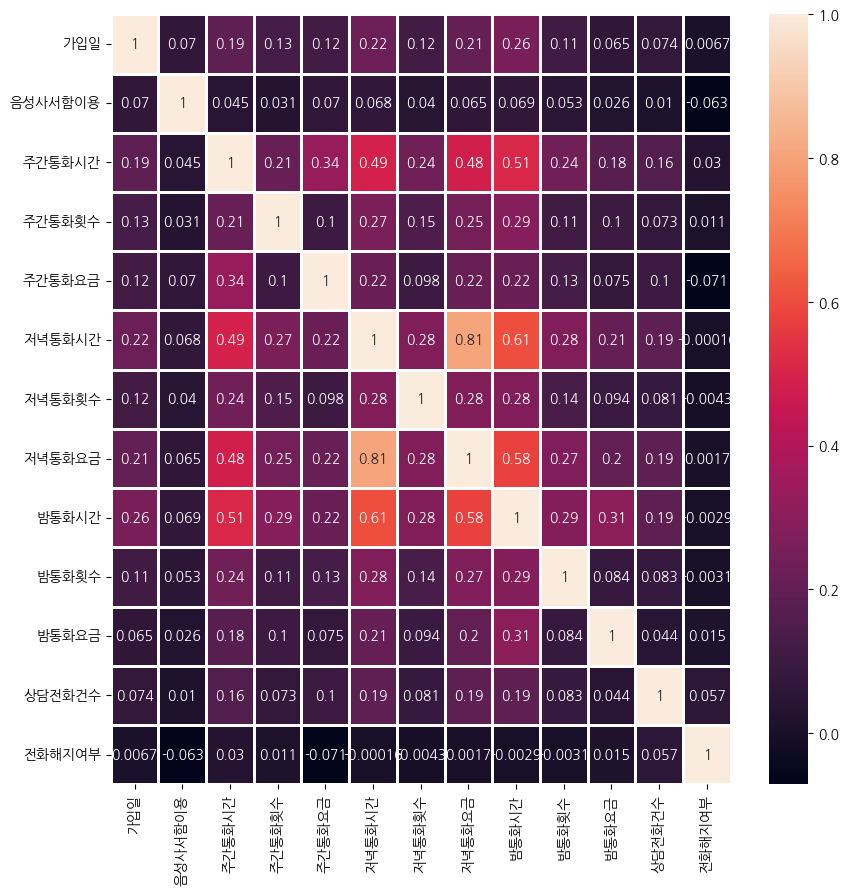

In [42]:
corr_matrix = train.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, linewidth=1)

In [43]:
train['총통화시간'] = train['주간통화시간']+train['저녁통화시간']+train['밤통화시간']
train['총통화요금'] = train['주간통화요금']+train['저녁통화요금']+train['밤통화요금']
train['총통화횟수'] = train['주간통화횟수']+train['저녁통화횟수']+train['밤통화횟수']


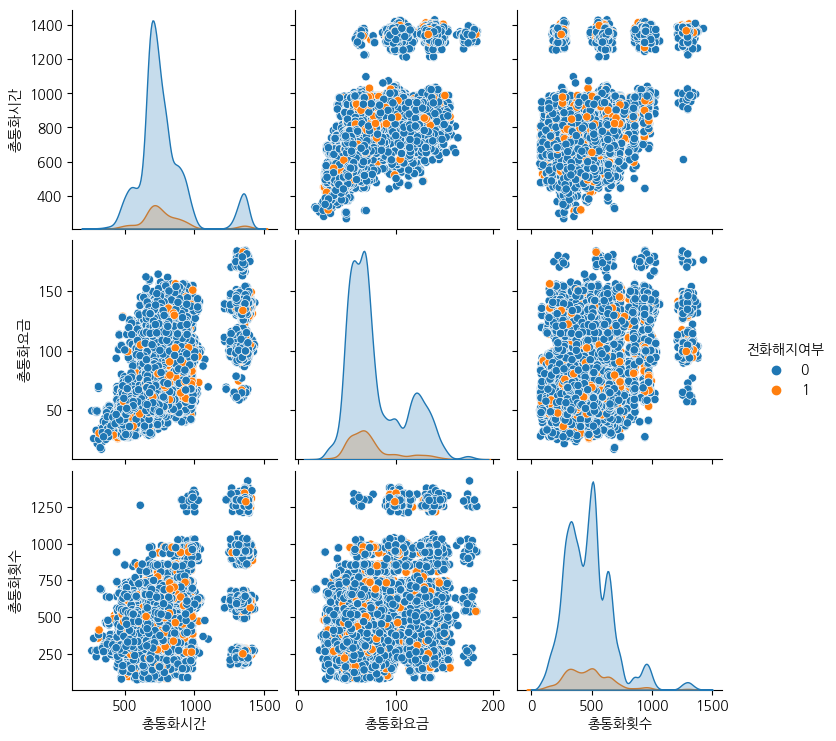

In [44]:
attributes = ['총통화시간', '총통화요금', '총통화횟수', '전화해지여부' ]
sns.pairplot(train[attributes], hue='전화해지여부')

In [45]:
train['평균통화시간'] = train['총통화시간']/train['총통화횟수']
train['평균통화요금'] = train['총통화요금']/train['총통화시간']

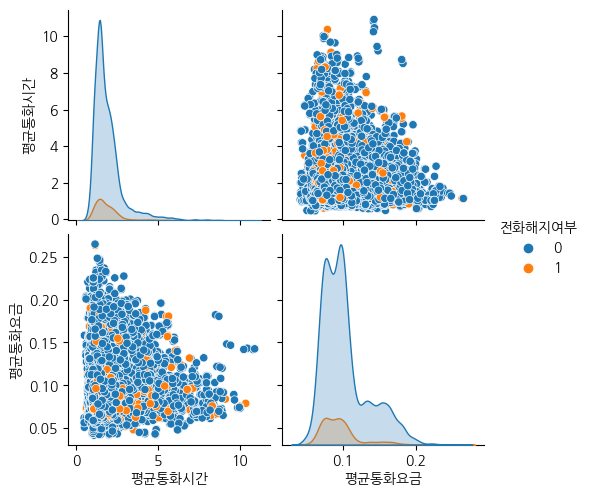

In [46]:
attributes = ['평균통화시간', '평균통화요금', '전화해지여부' ]
sns.pairplot(train[attributes], hue='전화해지여부')